# Predicting the Extent of Vehicle Damage in Montgomery County, Maryland Collisons

By Cameron Oakley


## Introduction


In this notebook, we will explore Montgomery County's car crash data from 2015-2022. The Montgomery County car crash data has several values for damage extent. Including data on if the car damage extent was disabled, superficial, none, and destroyed. This dataset provides interesting info regarding the driving conditions during the time of the crash, such as day or night, and for roads dry or wet. Our goal is to predict whether a crash will result in a car being disabled. Other data contains information about the location of the impact, the vehicle body type, and the type of collision. Another goal we have is to have models that are do not have high variance or bias. Lastly, we should investigate the impact each feature has on the algorithm.

For our process, we will start with the initial data exploration and investigate the dataset from the surface level down to specific conditions. Once we understand the data in this dataset we will begin preprocessiing the data. We will investigate missing data and drop variables that do not provide anything for our alogorithms. Data will be replaced to make better to make interpretation easier. After preprocessing, we will explore the dataset at a deeper level. This includes investigating our predictor variables and investigating any thing interesting in the dataset. Lastly, we will perform some machine learning and try to determine the damage extent of a car after a crash.

This dataset was downloaded from the Montgomery County website on December 4, 2022.

https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Drivers-Data/mmzv-x632

Questions to answer:
- Can we reliably predict if a car will be disabled?
- Do our models have high variance or bias?
- What are the important features used to make accurate predictions?

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

In [248]:
sns.set()
plt.figure(figsize=(5,5))

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

Let us read the data.

In [249]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [250]:
df = pd.read_csv('/content/drive/MyDrive/DS_Project_2/car_crash_data.csv', index_col=0);

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Initial data exploration

In this part of the notebook, we will investigate some of the basic statistics and explore the different datatypes.

### Data Analyzation

What type of data is included in this dataset?

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151213 entries, DD5620004G to MCP33310013
Data columns (total 42 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Local Case Number               151213 non-null  object 
 1   Agency Name                     151213 non-null  object 
 2   ACRS Report Type                151213 non-null  object 
 3   Crash Date/Time                 151213 non-null  object 
 4   Route Type                      136425 non-null  object 
 5   Road Name                       137226 non-null  object 
 6   Cross-Street Type               136401 non-null  object 
 7   Cross-Street Name               137221 non-null  object 
 8   Off-Road Description            13985 non-null   object 
 9   Municipality                    16774 non-null   object 
 10  Related Non-Motorist            4749 non-null    object 
 11  Collision Type                  150710 non-null  object 
 12  Weather

From this, we learn there are over 150,000 rows in this dataset. The dataset seems like it has information regarding the damage extent, impact location, and weather and road conditions at the time of the crash. We can also see that a few of the variables are missing nearly all of the data. We most likely won't be able to do anything with motorist data, Off Road Description, and Municipality. It is also clear that most of the data is categorical and there are only a few non-object variables. 

In this dataset:
- Each row represent a crash that occured.
- 'Vehicle' refers to the information collected from the damaged vehicle. None of the variables have information about the other car(s) from the collision.

### Quantitative Data

As we learned, there are not that many non-object variables. Let us look at some information regarding these non-object variables.

What quantitative columns are included in the dataset?

In [252]:
df.describe().round(2)

,Speed Limit,Vehicle Year,Latitude,Longitude
count,151213.00,151213.00,151213.00,151213.00
mean,32.67,1966.92,39.08,-77.11
std,11.07,338.82,0.07,0.10
min,0.00,0.00,37.72,-79.49
25%,30.00,2005.00,39.02,-77.19
50%,35.00,2011.00,39.07,-77.11
75%,40.00,2015.00,39.14,-77.04
max,70.00,9999.00,39.99,-75.53


From this we learn more about the quantitative variables in this dataset. We can see that the Vehicle Year has missing and bad data. The lowest year that occurs is 0, which could be classified as missing data. Whereas the highest year is 9999, this could be considered bad data. We also learn there is a variable for the Local Case Number, Longitude, and Latitude. These variables don't need statistics, so we do not learn much about these variables.

Earlier we saw that this dataset has information regarding Vehicle ID and Person ID. Let us look at the first 10 values in both columns to get a better understandning as to why these are object variables.

In [253]:
df[['Person ID', 'Vehicle ID']].head(10)

,Person ID,Vehicle ID
Report Number,,
DD5620004G,6558DDB6-C713-4B50-9CDD-4A265FE507B9,940390C5-2D67-4B95-BCE3-FDF38AA42ECD
MCP29620057,7A8F59F9-9886-4D41-B72C-0043BC462A05,796D6E97-FC6F-4CB5-BCC0-E77F10D6220D
MCP2651004P,76882265-673F-4B24-92B3-5F901CD7DD76,C05DE6D9-EA1E-4736-A29C-A08B2EC10629
MCP3050004K,193D33B6-4BAB-4A82-A4E7-CE35BA3B28F1,06DEBB17-3C98-421B-A368-8578A48773B2
MCP2641001J,5E259E14-1216-4388-87FB-925035107021,5146C181-7BFF-41CB-ADB8-8AFECD67FCD1
MCP27100039,0F7ECAF5-441D-44C3-B48F-7B00DCCAD53D,828900BA-816A-4464-8DD3-2291E72DD1FC
DD5641000P,FB5C9177-7CC6-41EE-A396-7F10FE8136B8,96ECD8D6-8167-4087-B464-AE30E2CE630F
MCP1119008K,3BB6620B-4894-4F94-89FA-808F3E5987AE,F223EE9E-A0CF-4114-BF93-65483653D8EB
MCP3215000R,6CC9F934-5D5C-4F21-9F8D-C1FC7E9DE8DE,FBBDA569-946D-4A2F-8F09-F18D66880BE3


We see that these values are all unique. Let us see the number of unique values in each of the columns.

In [254]:
print('Vehicle ID has {} unique values while Person ID has {}.'.format(df['Vehicle ID'].nunique(), df['Person ID'].nunique()))

Vehicle ID has 151213 unique values while Person ID has 151213.


Given that all of the values are unique it would be worthwhile to drop the variables.

### Categorical Data

Next, let us take a look at the categorical data.

What categorical columns are included in the dataset?

In [255]:
df[df.select_dtypes(include='object').columns].head(10)

,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Body Type,Vehicle Movement,Vehicle Continuing Dir,Vehicle Going Dir,Driverless Vehicle,Parked Vehicle,Vehicle Make,Vehicle Model,Equipment Problems,Location
Report Number,,,,,,,,,,,,,,,,,,,,,
DD5620004G,190046109,Rockville Police Departme,Property Damage Crash,09/26/2019 07:20:00 AM,NaN,NaN,NaN,NaN,PARKING LOT,NaN,...,SCHOOL BUS,OTHER,South,South,No,No,THOMAS,BUS,NO MISUSE,"(39.10351817, -77.15766933)"
MCP29620057,200023865,Montgomery County Police,Property Damage Crash,06/18/2020 02:00:00 AM,County,DAIRYMAID DR,County,METZ DR,NaN,NaN,...,UNKNOWN,UNKNOWN,Unknown,Unknown,No,No,UNK,UNK,UNKNOWN,"(39.15484667, -77.271245)"
MCP2651004P,210035267,Montgomery County Police,Property Damage Crash,09/08/2021 12:30:00 PM,NaN,NaN,NaN,NaN,PARKING LOT OF 10109 COLESVILLE RD,NaN,...,(SPORT) UTILITY VEHICLE,BACKING,North,West,No,No,TOYOTA,SUV,UNKNOWN,"(39.02030267, -77.01143583)"
MCP3050004K,200016465,Montgomery County Police,Property Damage Crash,04/19/2020 03:39:00 PM,County,RUSSETT RD,County,ARCTIC AVE,NaN,NaN,...,VAN,ACCELERATING,East,East,No,No,DODGE,GRAND CARAVAN,NO MISUSE,"(39.08006167, -77.097845)"
MCP2641001J,200016526,Montgomery County Police,Injury Crash,04/20/2020 09:15:00 AM,County,ARCHDALE RD,County,GUNNERS BRANCH RD,NaN,NaN,...,PASSENGER CAR,UNKNOWN,North,North,No,No,HONDA,CR-V,UNKNOWN,"(39.17523, -77.24109)"
MCP27100039,200016305,Montgomery County Police,Property Damage Crash,04/17/2020 05:00:00 PM,Municipality,E DIAMOND AVE,Municipality,S SUMMIT AVE,NaN,GAITHERSBURG,...,PASSENGER CAR,STOPPED IN TRAFFIC LANE,North,North,No,No,TOYOTA,4S,NaN,"(39.140555, -77.19334667)"
DD5641000P,200016622,Rockville Police Departme,Property Damage Crash,04/21/2020 06:45:00 AM,Municipality,WOOTTON PKWY,Municipality,TOWER OAKS BLVD,NaN,ROCKVILLE,...,PASSENGER CAR,STOPPED IN TRAFFIC LANE,West,West,No,No,TOYT,4S,NO MISUSE,"(39.066925, -77.154085)"
MCP1119008K,200013792,Montgomery County Police,Property Damage Crash,03/24/2020 07:13:00 AM,County,CASHELL RD,County,MUSIC GROVE CT,NaN,NaN,...,POLICE VEHICLE/NON EMERGENCY,MOVING CONSTANT SPEED,South,South,No,No,FORD,EXPLORER,NO MISUSE,"(39.13132667, -77.08323667)"
MCP3215000R,200016143,Montgomery County Police,Property Damage Crash,04/16/2020 12:08:00 AM,County,FALLS RD,County,BRICKYARD RD,NaN,NaN,...,POLICE VEHICLE/EMERGENCY,MOVING CONSTANT SPEED,North,North,No,No,DODGE,CHARGER,NO MISUSE,"(39.002137, -77.226225)"


Note: The above output only shows the first 10 values in each of the selected columns.

From this output, we confirm that there are many categorical columns in this dataset. There seem to be variables that show us what the environment was like during the crash. Based on the variable names, some interesting variables are Weather, Surface Condition, Light, Vehicle Damage Extent, and Vehicle First Impact Location. The Agency Name variable probably will not be useful in determining damage extent.

What would be the most interesting data to investigate?

In [256]:
df.loc[: , df.columns.isin(['Road Name', 'Municipality', 'Weather', 'Surface Condition', 'Light', 'Person Id',
                            'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Second Impact Location',
                            'Vehicle Body Type', 'Vehicle Movement'])][:15]

,Road Name,Municipality,Weather,Surface Condition,Light,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement
Report Number,,,,,,,,,,
DD5620004G,NaN,NaN,CLEAR,NaN,DAYLIGHT,SUPERFICIAL,TWELVE OCLOCK,TWELVE OCLOCK,SCHOOL BUS,OTHER
MCP29620057,DAIRYMAID DR,NaN,CLOUDY,DRY,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN
MCP2651004P,NaN,NaN,CLEAR,NaN,DAYLIGHT,SUPERFICIAL,SIX OCLOCK,SIX OCLOCK,(SPORT) UTILITY VEHICLE,BACKING
MCP3050004K,RUSSETT RD,NaN,CLEAR,DRY,DAYLIGHT,DISABLING,TWELVE OCLOCK,FOUR OCLOCK,VAN,ACCELERATING
MCP2641001J,ARCHDALE RD,NaN,CLOUDY,DRY,DAYLIGHT,DISABLING,ELEVEN OCLOCK,ELEVEN OCLOCK,PASSENGER CAR,UNKNOWN
MCP27100039,E DIAMOND AVE,GAITHERSBURG,NaN,DRY,DAYLIGHT,SUPERFICIAL,SIX OCLOCK,SIX OCLOCK,PASSENGER CAR,STOPPED IN TRAFFIC LANE
DD5641000P,WOOTTON PKWY,ROCKVILLE,CLEAR,DRY,DAWN,DESTROYED,SIX OCLOCK,SIX OCLOCK,PASSENGER CAR,STOPPED IN TRAFFIC LANE
MCP1119008K,CASHELL RD,NaN,CLOUDY,DRY,DAYLIGHT,FUNCTIONAL,ELEVEN OCLOCK,ELEVEN OCLOCK,POLICE VEHICLE/NON EMERGENCY,MOVING CONSTANT SPEED
MCP3215000R,FALLS RD,NaN,CLEAR,DRY,DARK LIGHTS ON,SUPERFICIAL,TWELVE OCLOCK,TWELVE OCLOCK,POLICE VEHICLE/EMERGENCY,MOVING CONSTANT SPEED


Note: The above table shows only the first 15 rows of the selected columns.

From this we learn that we get an idea of what sort of values these have. It seems Municipality has a lot of missing data. Also, we can see that the Vehicle First Impact Location and Vehicle Second Impact Location match each other. Because of this it would be worthwhile to drop the Vehicle Second Impact Location.

The most interesting columns are Weather, Surface Condition, Light, Vehicle Damage Extent, and Vehicle First Impact Location. Let us look into these five variables a bit closer.

Since we will be using Vehicle Damage Extent as our target variable, let us investigate the different values in Vehicle Damage Extent.

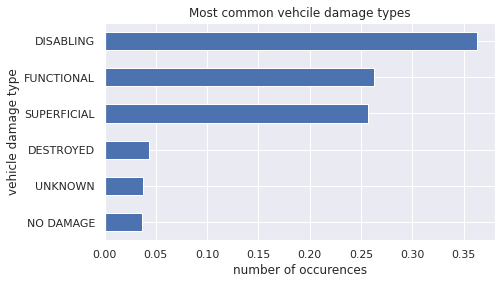

In [257]:
s_damage = df['Vehicle Damage Extent'].value_counts(normalize=True)[df['Vehicle Damage Extent'].value_counts(normalize=True) > 0.01]
s_damage.sort_values().plot.barh(figsize=(7,4))
plt.title('Most common vehcile damage types')
plt.xlabel('number of occurences')
plt.ylabel('vehicle damage type');

From this plot, we learn that after a crash most cars are in DISABLING state. However, cars can also be in a FUNCTIONAL or SUPERFICIAL state. It would be interesting to explore the DISABLING state further and see what the environmental conditions were at the time of the crash. Also, it would be worthwhile to merge DISABLING and DESTROYED into one value. Given a car is destroyed due to a crash it will not be driveable.

Typically, most people tend to drive during the day and weather conditions are usually clear skies and dry roads. For the Weather and Surface Conditions variables we should expect to see clear skies and dry roads as the most common value type. Also, for the Light variable we should expect to see most crashes occur during daylight hours.

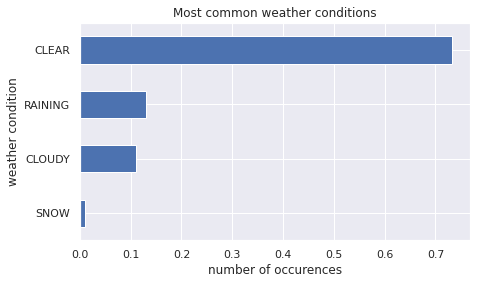

In [258]:
s_weather = df['Weather'].value_counts(normalize=True)[df['Weather'].value_counts(normalize=True) > 0.01]
s_weather.sort_values().plot.barh(figsize=(7,4))
plt.title('Most common weather conditions')
plt.xlabel('number of occurences')
plt.ylabel('weather condition');

From this plot, we learn something interesting; we predicted clear weather would be the most common weather type for the car crashes, but from this we learn that CLEAR and RAINING make up a pretty much all of the weather condition data. When we investigate further we should only consider CLEAR and RAINING weather conditions. 

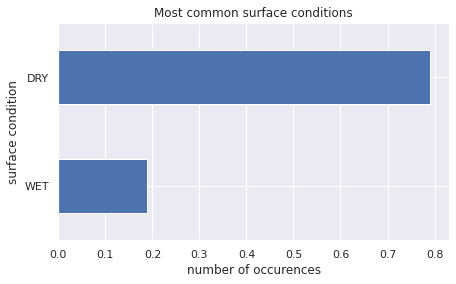

In [259]:
s_surface = df['Surface Condition'].value_counts(normalize=True)[df['Surface Condition'].value_counts(normalize=True) > 0.01]
s_surface.sort_values().plot.barh(figsize=(7,4))
plt.title('Most common surface conditions')
plt.xlabel('number of occurences')
plt.ylabel('surface condition');

From this plot, we learn that in this dataset almost all of the crashes occured on DRY surface conditions. Again, this isn't that suprising. When we investigate further we should only consider DRY and WET surface conditions.

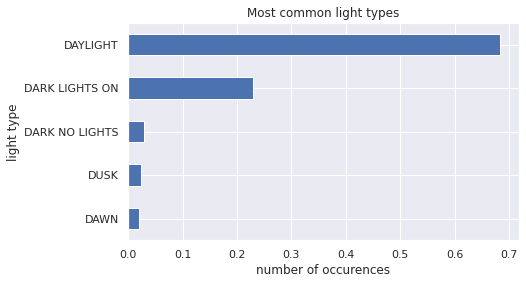

In [260]:
s_damage = df['Light'].value_counts(normalize=True)[df['Light'].value_counts(normalize=True) > 0.01]
s_damage.sort_values().plot.barh(figsize=(7,4))
plt.title('Most common light types')
plt.xlabel('number of occurences')
plt.ylabel('light type');

From this plot, we learn that most crashes occur primarily during daylight hours; this matches our prediction. There is also a large fraction of crashes that occur during nighttime hours. It would be interesting to investigate if some of the DARK values could be combined into one value.

The Vehicle First Impact Location variable could provide alot of useful information about the crash. Let us investigate it further.

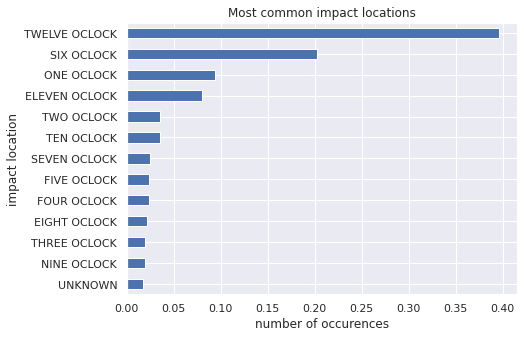

In [261]:
s_impact = df['Vehicle First Impact Location'].value_counts(normalize=True)[df['Vehicle First Impact Location'].value_counts(normalize=True) > 0.01]
s_impact.sort_values().plot.barh(figsize=(7,5))
plt.title('Most common impact locations')
plt.xlabel('number of occurences')
plt.ylabel('impact location');

From this plot, we learn that front end and rear end accidents make up nearly 40% of the data. When considereing one, two, ten, eleven, and twelve o'clock these values make up about 65% of the data. This would be interesting to investigate further. Also, it may be more helpful to combine some of these values so that they are more interprettable.

## Data cleaning and preprocessing

In this part of the notebook, we will explore which variables are missing the most NA values, which variables can be dropped to improve machine-learning efficiency, and which values can be replaced

#### Misisng Data

As discussed earlier, the Off Road Description, Related Non Motorist, and Non Motorist Substance Abuse variables are missing almost all of their data. Let us explore the rest of the missing data.

Which columns have missing data?

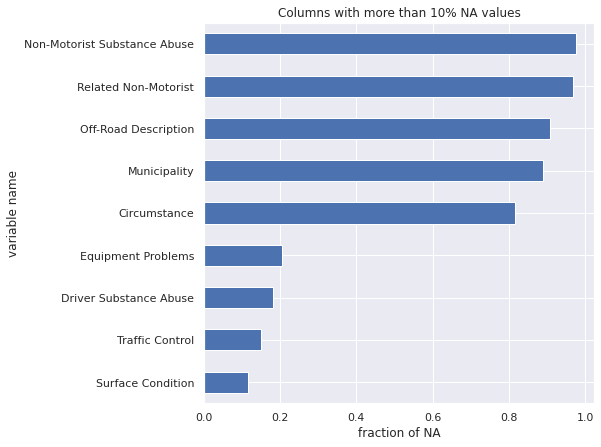

In [262]:
df.isna().mean()[df.isna().mean() > .1].sort_values(ascending=True).plot.barh(figsize=(7,7))
plt.title('Columns with more than 10% NA values')
plt.xlabel('fraction of NA')
plt.ylabel('variable name');

From this plot, we confirm our suspicions; we also learn that the Municipality and Traffic Control variables are also missing almost all of their data. These variables would be worth dropping. Earlier, we took a look at the Weather and Surface Condition variables. From this plot, we learn both columns have about 10% missing data. For these variables it would be worthwhile to drop the NA values. If we were drop both variables we would lose a lot of useful data.

Are there any missing values that we weren't able to catch?

In [263]:
((df == 'UNKNOWN') | (df == 0)).sum().sum()

81538

We learn that there are over 81,000 unknown or 0 values not caught, but in relation to size of the data set this is relatively small.

### Dropping variables

#### Dropping variables based on NA values

We found that there a few columns in this data set that have over 80% NA values. NA values can hurt the accuracy of our machine-learning algorithms. Because of this let us drop columns with the most NA values so that we do not lose too much data when dropping all NA values.

In [264]:
df.drop(columns=['Off-Road Description', 'Related Non-Motorist', 'Non-Motorist Substance Abuse',
                'Municipality', 'Circumstance'], 
        inplace=True)

#### Dropping variables to help our machine-learning algorithms

Let us drop variables that will not help our machine-learning algorithms. Variables like Local Case Number, Person ID, and Vehicle ID have all unique values. Variables like Driver's License State, Vehicle Model, and Vehicle Going Direction do not provide any valuable information for predicting the damage extent of a crash. The variable Vehicle Second Impact Location seems like most of the data is similar to the Vehicle First Impact Location variable. Let us keep the first impact location variable and drop the second impact location variable.

In [265]:
df.drop(columns=['Local Case Number', 'Agency Name', 'Road Name',
                 'Cross-Street Name', 'Person ID', 'Driver Distracted By', 
                 'Drivers License State', 'Vehicle ID', 'Vehicle Second Impact Location',
                 'Vehicle Make', 'Vehicle Model', 'Vehicle Going Dir', 
                 'Vehicle Continuing Dir', 'Equipment Problems'], 
        inplace=True)

#### Dropping coordinate and time variables

Let us drop the longitude and latitude variables, as they would not benefit our algorithms in any way. Also, time data can be hard to work with since we need to account for cyclical values. Let us drop the time and date information.

In [266]:
df.drop(columns=['Latitude', 'Longitude', 'Location', 'Crash Date/Time',], 
        inplace=True)

#### Drop variables that are skewed

The Parked Vehicle and Driveless Vehicle variables have yes or no values. If we examine them further we will find that they are heavily skewed.

In [267]:
df['Parked Vehicle'].value_counts(normalize=True)

No     0.984472
Yes    0.015528
Name: Parked Vehicle, dtype: float64

In [268]:
df['Driverless Vehicle'].value_counts(normalize=True)

No         0.995615
Unknown    0.004385
Name: Driverless Vehicle, dtype: float64

Let us drop the variables that are heavily skewed as they will not help our machine-learning algorithms.

In [269]:
df.drop(columns=['Parked Vehicle','Driverless Vehicle'], 
        inplace=True)

#### Dropping all NA values

Let us drop NA values in the data set to help improve the efficiency of our machine-learning algorithms later on.

In [270]:
df.dropna(inplace=True, axis='rows')

### Replacing values

Let us replace values to help improve our machine learning models. We can can combine values into general columns to help reduce the number of unique values and help interpretability. 

This dataset has data on the impact location of the vehicle. Right now, the data is not very interpretable. Let us replace the values to help understandability.

In [271]:
df['Vehicle First Impact Location'].replace({'TEN OCLOCK':'FRONT-LEFT', 'ELEVEN OCLOCK':'FRONT', 
                'TWELVE OCLOCK':'FRONT', 'ONE OCLOCK':'FRONT', 'TWO OCLOCK':'FRONT-RIGHT',
                'NINE OCLOCK':'LEFT', 'THREE OCLOCK':'RIGHT', 'EIGHT OCLOCK':'BACK-LEFT',
                'SEVEN OCLOCK':'BACK', 'SIX OCLOCK':'BACK', 'FIVE OCLOCK':'BACK',
                'FOUR OCLOCK':'BACK-RIGHT'}, inplace=True)

The 'Light' variable has useful information about whether the light conditions are daytime or dark. There are a few values that relate to it being dark. It would be more helpful for us to combine them for our investigation and machine learning.

In [272]:
df['Light'].replace({'DARK LIGHTS ON':'NIGHTTIME', 'DARK NO LIGHTS':'NIGHTTIME', 
                'DARK -- UNKNOWN LIGHTING':'NIGHTTIME', 'DUSK':'DUSK/DAWN',
                'DAWN':'DUSK/DAWN'}, inplace=True)

Now that the light values and impact location have more interprettable values we will be able to explore them further.

Let us replace some of the values to make them more general.

In [273]:
df['Collision Type'].replace({'SAME DIR REND RIGHT TURN':'SAME DIR', 
                'SAME DIR REND LEFT TURN':'SAME DIR', 'SAME DIRECTION LEFT TURN':'SAME DIR',
                'SAME DIRECTION RIGHT TURN':'SAME DIR', 'SAME DIRECTION SIDESWIPE':'SAME DIR',
                'SAME DIR BOTH LEFT TURN':'SAME DIR', 'OPPOSITE DIR BOTH LEFT TURN':'OPPOSITE',
                'OPPOSITE DIRECTION SIDESWIPE':'OPPOSITE', 'UNKNOWN':'OTHER', 
                'ANGLE MEETS RIGHT TURN':'OTHER', 'ANGLE MEETS LEFT HEAD ON':'OTHER',
                'ANGLE MEETS LEFT TURN':'OTHER', 'STRAIGHT MOVEMENT ANGLE':'OTHER',
                'SINGLE VEHICLE':'OTHER', 'HEAD ON LEFT TURN':'HEAD ON'}, 
                inplace=True)

In [274]:
df['Vehicle Body Type'].replace({'TRANSIT BUS':'BUS', 'SCHOOL BUS':'BUS', 'OTHER BUS':'BUS', 
                'CROSS COUNTRY BUS':'BUS', 'STATION WAGON':'PASSENGER CAR',
                'CARGO VAN/LIGHT TRUCK 2 AXLES (OVER 10,000LBS (4,536 KG))':'VAN',
                'MEDIUM/HEAVY TRUCKS 3 AXLES (OVER 10,000LBS (4,536KG))':'TRUCK',
                'OTHER LIGHT TRUCKS (10,000LBS (4,536KG) OR LESS)':'TRUCK',
                'PICKUP TRUCK':'TRUCK', '(SPORT) UTILITY VEHICLE':'SUV'}, 
                inplace=True)

In [275]:
df['Injury Severity'].replace({'SUSPECTED MINOR INJURY':'SUSPECTED MINOR/MAJOR', 
                'SUSPECTED SERIOUS INJURY':'SUSPECTED MINOR/MAJOR'}, 
                inplace=True)

Earlier we found that the Vehcile year data had some bad values. Because of this lets focus on cars that were made within a certain time period. Let us consider vehciles made within the last 40 years. 

First let us investigate the maximum and minimum values of the variable and how much of this variable's data will match our time frame.

In [276]:
print('The lowest vehicle year is {}, while the highest vehicle year is {}. {:.3f} of the data is within the years 1980 to 2022.'.format(df['Vehicle Year'].min(), df['Vehicle Year'].max(), ((df['Vehicle Year'] >= 1980) & (df['Vehicle Year'] <= 2022)).mean()))

The lowest vehicle year is 0, while the highest vehicle year is 9999. 0.991 of the data is within the years 1980 to 2022.


Now let us modify the dataframe to focus on this timeframe.

In [277]:
mask = ((df['Vehicle Year'] >= 1980) & (df['Vehicle Year'] <= 2022)).values
df = df[mask]

## Data exploration and visualization

In this part of the notebook, we will investigate the cars that have a disabled damage extent.

In [278]:
df_disabling = df[(df['Vehicle Damage Extent'] == 'DISABLING') | (df['Vehicle Damage Extent'] == 'DESTROYED')]

Things to investigate, when a car has a disabled damage extent:
- What are the most common environmental conditions?
- What are the different impact locations?
- What information can we learn from the vehicle information?

#### Exploring environmental conditions

What were the environmental conditions when the car was disabled? We should expect that in most crashes the surface conditions were dry, the weather was clear, and it occured during daylight hours.

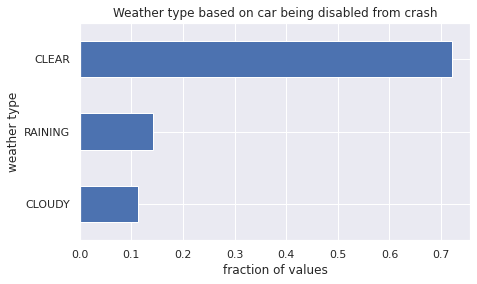

In [279]:
s_weather = df_disabling['Weather'].value_counts(normalize=True)[df_disabling['Weather'].value_counts(normalize=True) > .02]
s_weather.sort_values(ascending=True).plot.barh(figsize=(7,4))
plt.title('Weather type based on car being disabled from crash')
plt.xlabel('fraction of values')
plt.ylabel('weather type');

From this plot, we confirm our suspicions that most crashes occur in clear weather conditions. This makes sense since clear weather is the most common weather type.

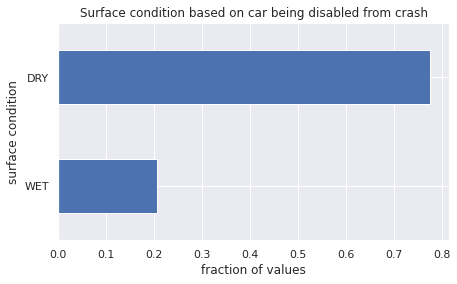

In [280]:
s_surface = df_disabling['Surface Condition'].value_counts(normalize=True)[df_disabling['Surface Condition'].value_counts(normalize=True) > .02]
s_surface.sort_values(ascending=True).plot.barh(figsize=(7,4))
plt.title('Surface condition based on car being disabled from crash')
plt.xlabel('fraction of values')
plt.ylabel('surface condition');

From this plot, we confirm our suspicions that most accidents occur on dry roads. If we look at the weather condition plot above we notice that 70% of crashes occur in clear weather. Similarly, here we notice 70% of car crashes occur in dry road conditions. This makes sense since clear weather conditions correlate with dry roads.

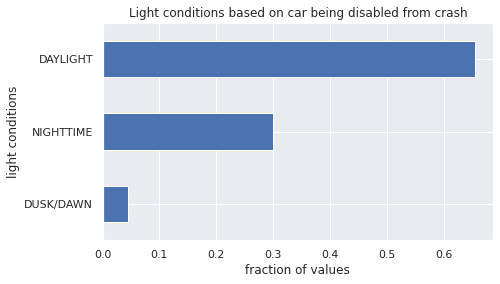

In [281]:
s_light = df_disabling['Light'].value_counts(normalize=True)[df_disabling['Light'].value_counts(normalize=True) > .02]
s_light.sort_values(ascending=True).plot.barh(figsize=(7,4))
plt.title('Light conditions based on car being disabled from crash')
plt.xlabel('fraction of values')
plt.ylabel('light conditions');

From this plot, we learn that based on crashes that result in a disabled car, almost all the occurences happened during daylight and nighttime hours. It is interesting to see that DUSK/DAWN has a small percentage of crash data. Since our initial exploration we have combined some of the variables to account for general relationships. Dusk and dawn only last about one hour respectively. It could be that all the crashes under our scope occur during rush hour or when people are heading to work in the morning. Earlier when we investigating the entire dataset, we found that almost all car crashes in this dataset occured during the day and there was a small percentage of crashes that occured at night. Since then we have combined values into the nighttime value and now we see a better representation of nighttime crashes.

What do we learn from these plots?

During our initial data exploration, we investigated the fraction of values from the Weather, Surafce Condition, and Light variables. Now that we are investigating these variables at a deeper level we learn that the fraction of values in the Weather and Surface Condition variables have stayed relatively the same. We still notice that the fraction of accidents that occur on dry roads is around 70%, while accidents that occur on wet roads are around 20%. Also, 70% of crashes occur in clear weather, while 10% of crashes occur in rainy or cloudy weather.

It is interesting that the fraction of crashes that occur on wet roads and result in a car being disabled is not higher. It would make sense that if road conditions were wet or the weather was raining it would lead to more accidents, therefore we'd see an increased number of disabling crashes in this category; however, this is not what we see.

#### Exploring impact data

What were the different impact locations and collision types when the car was disabled? We should expect that in most crashes the impact location is in front of the car.

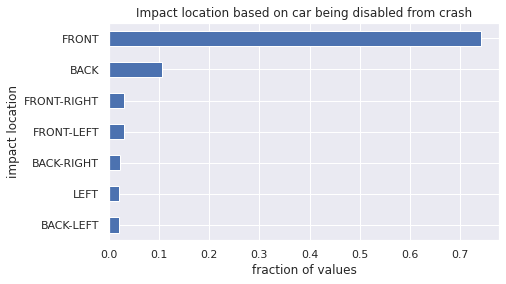

In [282]:
s_impact = df_disabling['Vehicle First Impact Location'].value_counts(normalize=True)[df_disabling['Vehicle First Impact Location'].value_counts(normalize=True) > .02]
s_impact.sort_values(ascending=True).plot.barh(figsize=(7,4))
plt.title('Impact location based on car being disabled from crash')
plt.xlabel('fraction of values')
plt.ylabel('impact location');

From this plot, we learn that most common impact location is the front or rear of the car. It makes sense that cars that damage the front of their car are disabled. If you damage your engine the car will no longer be driveable. For cars that were hit from behind, maybe because of the impact their car was pushed forward and tehy crashed into another car. Leading to the car's engine to be damaged and the car being disabled.

#### Exploring vehicle information

Let us explore the crash data for variables based on vehicle information.

What is the distribution of crashes based on the vehicle's year of release?

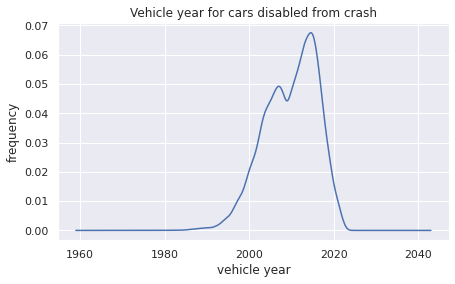

In [283]:
df_disabling['Vehicle Year'].sort_values(ascending=True).plot.density(figsize=(7,4))
plt.title('Vehicle year for cars disabled from crash')
plt.xlabel('vehicle year')
plt.ylabel('frequency');

It seems that cars that were made from 2010-2020 account for most crashes. It could be that since these cars are still relatively new, people haven't traded them in yet. Cars from the 80s and 90s are not driven as much anymore, which is why they are underrepresented in this plot. Also, it seems that cars made from 2020 onward do not occur in many of the crashes. This could be because people have not traded in their cars for newer ones, so there are fewer people driving cars made from 2020 onward.

What were the different vehicle body types from cars that were disabled?

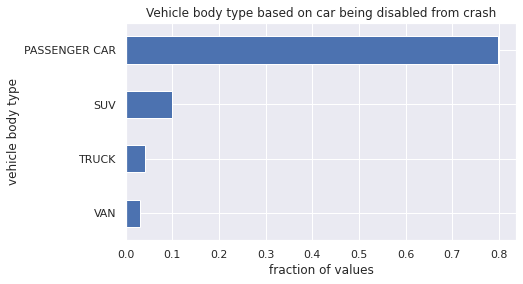

In [284]:
s_body = df_disabling['Vehicle Body Type'].value_counts(normalize=True)[df_disabling['Vehicle Body Type'].value_counts(normalize=True) > .02]
s_body.sort_values(ascending=True).plot.barh(figsize=(7,4))
plt.title('Vehicle body type based on car being disabled from crash')
plt.xlabel('fraction of values')
plt.ylabel('vehicle body type');

From this plot, we learn that the most common body type in disabled car crashes is a passenger car, and there is very little data for larger cars like SUVs, trucks, and vans. Passenger cars, SUVs, and trucks are the most popular vehicles driven by people. It is interesting to see that passenger cars make up most of the crash data. It could be that these cars have less space in the front of the car to cushion the impact. Another explanation could be that larger cars, like trucks, have better reinforcement around the engine, which helps protect the engine when impacts occur.

What do we learn?

We learn that vehicles made in 2010-2020 and sedans make up most of the car crash data. One thought is that maybe passenger cars released in 2010-2020 are popular because of their modern look. This could be a reason why cars during this time make up a lot of the car crash data.

## Machine learning

In this part of the notebook, we will begin to do some machine learning. Our goal is to determine if a car will be disabled after being in a crash. We should also aim to have models with no bias or variance and investigate the best features used to for our predictions. After computing a baseline, we will use KNN classification and a classification tree to see how much we can improve our accuracy.

### Data preparation for machine learning

Since we are predicting if a car is disabled as a result of a crash. Let us make a new variable that is binary. In this variable, 1 will represent the car was disabled and 0 if it is still operational. 

In [37]:
df['Disabled'] = df['Vehicle Damage Extent'].isin(['DISABLING', 'DESTROYED']).astype(int)

Let us drop the original Vehicle Damage Extent variable. 

In [38]:
df.drop(columns=['Vehicle Damage Extent'], 
        inplace=True)

The following two methods will help us merge miscellaneous variables into an 'Other' column. This will help to reduce the number of variables created from one-hot encoding and will keep any data from those fields since they might be important.

In [39]:
def mergeValuesHighTH (df, targets) :
  for i in targets :
    filter = df[i].value_counts(normalize=True)[df[i].value_counts(normalize=True) < .05].index
    df.replace(filter, 'OTHER', inplace=True)
  return df

In [40]:
def mergeValuesLowTH (df, targets) :
  for i in targets :
    filter = df[i].value_counts(normalize=True)[df[i].value_counts(normalize=True) < .02].index
    df.replace(filter, 'OTHER', inplace=True)
  return df

The following cells utilize the defined functions. After running these cells, the variables will have less values. This will help our machine learning algorithms.

In [41]:
df = mergeValuesHighTH (df, ['Route Type', 'Weather', 'Surface Condition', 'Traffic Control', 
                       'Driver Substance Abuse', 'Vehicle First Impact Location', 'Injury Severity',
                       'Cross-Street Type', 'Vehicle Movement', 'Collision Type'])

In [42]:
df = mergeValuesLowTH (df, ['Vehicle Body Type'])

#### Encoding the categorical variables

Let us perform one-hot encoding on our dataframe.

In [43]:
df = pd.get_dummies(df, drop_first=True)

As a sanity check let us check the shape of the data frame.

In [44]:
print('The data frame has {} incidents and {} variables'.format(df.shape[0], df.shape[1]))

The data frame has 88540 incidents and 43 variables


#### Test/Train split

Let us select target variables and define the list of predictors.

In [45]:
target = 'Disabled'
predictors = list(df.columns)
predictors.remove(target)

Let us perform a 70/30 test/train split.

In [46]:
X = df[predictors].values
y = (df[target] == 1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

### Methods used for machine learning

#### Method for forward feature selection

The following methods will be used for determining forward feature selection.

In [47]:
def forward_selection_classif(clf, X, y, threshold=None, num_folds=5):
    remaining = list(range(X.shape[1]))
    selected = []
    accuracies = []
    previous_best = 0.0
    while len(remaining) > 0 :
      overall_best = 0.0
      idx_overall = 0
      for i in remaining :
        score = cross_val_score(clf, X[:,selected+[i]], y, scoring='accuracy', cv=num_folds).mean()
        if score.mean() > overall_best :
          overall_best = score
          idx_overall = i

      if (threshold is not None) and (overall_best - previous_best) < threshold :
          break

      accuracies.append(overall_best)
      previous_best = overall_best
      remaining.remove(idx_overall)
      selected.append(idx_overall)

    return np.array(selected), accuracies

In [48]:
def plot_selected(selected, accuracies, predictors):
    pd.Series(accuracies, index=predictors[selected]).plot.barh()
    plt.xlim(0.5, 1.0)
    plt.xlabel('Cross-validation accuracy')
    plt.title('Result of forward feature selection')

#### Method for plotting learning curves

The following method will be used to plot learning curves.

In [49]:
def plot_learning_curve(clf, X_train, y_train):
    train_sizes, train_scores, test_scores = \
    learning_curve(clf, X_train, y_train, cv=10, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, label='train')
    plt.plot(train_sizes, test_scores_mean, label='test')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title('Learning curve, classification tree')
    plt.legend();

#### Method for plotting a classification tree

The following method will be used to plot classification trees.

In [76]:
def plot_tree_custom(clf):
    target_names = ['disabled', 'not disabled']
    dot_data = export_graphviz(clf, precision=2,
                         feature_names=predictors,  
                         proportion=True,
                         class_names=target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
    graph = graphviz.Source(dot_data)  
    return graph

### Computing the baseline accuracy

Let us investigate the baseline accuracy. This will tell us the accruacy we would have if we always predict a car crash will result in the car being disabled.

In [50]:
s_mode = pd.Series(y_train).mode()[0]
print('The training set has {} incidents. The baseline accuracy is: {:.3f}'.format(X_train.shape[0], (y_train == s_mode).mean()))

The training set has 61978 incidents. The baseline accuracy is: 0.542


Using a simple baseline model we can achieve about 54% accuracy. We should expect to see higher accuracy values in the other models.

### Building a KNN classification model

Let us begin our machine-learning process by creating and training a default KNN classifier on the training data. Then we will test the accuracy of the model on our test data.

In [55]:
clf = KNeighborsClassifier()

Let us fit the default KNN classifier on the training data.

In [ ]:
clf.fit(X_train, y_train)

KNeighborsClassifier()

Now that the model has been trained on the data, let us investigate the accuracy of data it has not seen before.

In [ ]:
test_accuracy = clf.score(X_test, y_test)
print('Default parameter test accuracy: {:.3f}'.format(test_accuracy))

Test accuracy: 0.674


Using the default parameters of the KNN classifier we get an accuracy score of about 67%. This is a pretty significant improvement from our baseline. Our baseline was 54% which is unreliable for making predictions. When using the KNN classifier with default parameters we get a more reliable prediction. However, there is still room for improvement.

#### Hyperparameter tuning

Let us investigate the impact that tuning the KNN classifier hyperparameters would have on the accuracy score. When tuning hyperparameters we will start by investigating the CV accuracies of K values and then use grid search to determine the best weight and distance function to train with. While tuning parameters we should expect to see longer trianing times.

Let us first determine the best K to choose. We will need to redefine the classifier since it has seen the test data. Also, we will need a dictionary with different combinations for K. Once we find the best K to use we can determine the best weight and distance formula to use. We will use 5 fold CV for now.

What is the best K to use for our models?

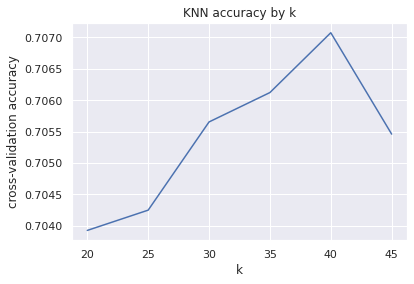

In [64]:
cv_accuracy = []
ks = np.arange(20,50,5)
for k in ks:
  knn = KNeighborsClassifier(n_neighbors=k)
  accs = cross_val_score(knn, X_train, y_train, scoring="accuracy", cv=5) 
  cv_accuracy.append(accs.mean())
  
plt.plot(ks, cv_accuracy)
plt.title('KNN accuracy by k')
plt.xlabel('k')
plt.ylabel('cross-validation accuracy');

From this learn that the most optimal K value to have is somewhere around 35-40.

Let us take another look at the best K to use. This time we will have narrow our search for possible K combinations.

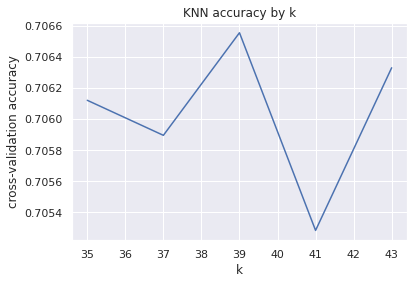

In [ ]:
cv_accuracy = []
ks = np.arange(35,45,2)
for k in ks:
  knn = KNeighborsClassifier(n_neighbors=k)
  accs = cross_val_score(knn, X_train, y_train, scoring="accuracy", cv=5) 
  cv_accuracy.append(accs.mean())
  
plt.plot(ks, cv_accuracy)
plt.title('KNN accuracy by k')
plt.xlabel('k')
plt.ylabel('cross-validation accuracy');

From this we learn the best K to use when fitting our model on the training data is 39.

Now that we have determined the best K let us investigate which weight and distance function we should use. Since we will now have the best hyperparameters for our model, we will use a 10 fold CV.

In [67]:
grid = [ {'n_neighbors': [39], 'weights': ['uniform', 'distance'], 'p': [1,2]} ]
knnCV = GridSearchCV(KNeighborsClassifier(), grid, cv=10, scoring='accuracy')

Let us fit the model on the training data.

In [68]:
knnCV.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [39], 'p': [1, 2],
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy')

After training the classifier on the training data, the grid search method has determined the best hyperparameters to use to get the best score. Let us investigate this further.

What were the best parameters used to train the model?

In [69]:
print(knnCV.best_params_)

{'n_neighbors': 39, 'p': 1, 'weights': 'uniform'}


From this we find that best parameters for the model were setting K to 39 and using uniform weight and Manhatten distance.

#### KNN classification accuracy

Since we have found the most optimal parameters, let us investigate how well our model does against data it has never seen before.

Let us define a grid search using the best parameters. We will use 10 fold CV.

In [70]:
grid = [ {'n_neighbors': [39], 'weights': ['uniform'], 'p': [1]} ]
knnCV = GridSearchCV(KNeighborsClassifier(), grid, cv=10, scoring='accuracy')

Let us fit the model on the training data.

In [71]:
knnCV.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [39], 'p': [1],
                          'weights': ['uniform']}],
             scoring='accuracy')

After finding the best parameters for our model, let us see how well it does against data that it has never seen before.

In [74]:
test_accuracy = knnCV.score(X_test, y_test)
print('Test accuracy: {:.3f}'.format(test_accuracy))

Test accuracy: 0.707


When using the best parameters we can get an accuracy score of about 71% on test data. This is better than our baseline accuracy and the accuracy of the model using default parameters. So far, this is the most reliable score we have gotten.

### Building a classification tree model

Let us create and train a flexible tree classifier on the training data. With this flexible model, we should expect to find that it has a high variance. We will attempt to reduce the overfitting afterwards.

In [ ]:
clf = DecisionTreeClassifier(max_depth=7)

Let us fit the model on the training data.

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

Now that the flexible model has been trained on the data. Let us test the accuracy of data it has not seen before.

In [ ]:
test_accuracy = clf.score(X_test, y_test)
print('Test accuracy: {:.3f}'.format(test_accuracy))

Test accuracy: 0.712


Using a flexible tree classifier we get an accuracy score of 71% on the training data. This is a pretty significant improvement from our baseline, which was 54%. This tree classifier is also able to obtain a higher accuracy score when compared to the default and tuned KNN classifier. The best KNN model was able to obtain 70.7%, this default tree model can acheive a slightly higher accuracy of 71.2%.

Let us investigate the learning curve of our classification tree. Since we used a flexible model and allowed for overfitting we should expect to see high variance.

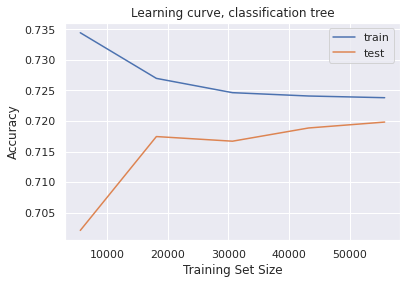

In [ ]:
plot_learning_curve(clf, X_train, y_train)

From this plot we learn something interesting, we expected to find that our model would have high variance. However, it seems that the parameters we used are causing some bias in the model. A new goal for us is to try and make the model less biased. 

While the accuracy score is already reliable we should tune the hyperparameters of our model and try to get a better accuracy score. It will be interesting to see how much our accuracy and learning curve imporove once the best parameters have been determined. We should expect that with the best parameters are model will be less biased.

#### Hyperparameter tuning

Let us tune the classification tree's hyperparameters. When tuning hyperparameters we will use grid search to determine the best max depth to use, how many features to consider, and the minimum number of leaf nodes. 

In [ ]:
tree_cv = GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), param_grid=[{'max_depth': range(2, 16), 
            'max_features': ['auto', None], 'min_samples_leaf': range(10, 100, 10)}], scoring='accuracy')

Let us fit the model on the training data. While tuning parameters we should expect to see longer trianing times and slightly higher accuracy scores.

In [ ]:
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': range(2, 16),
                          'max_features': ['auto', None],
                          'min_samples_leaf': range(10, 100, 10)}],
             scoring='accuracy')

After training the classifier on the training data, the grid search method has determined the best hyperparameters to use to get the best score. Let us investigate this further.

What were the best parameters used to train the model?

In [ ]:
print(tree_cv.best_params_)

{'max_depth': 13, 'max_features': None, 'min_samples_leaf': 40}


From this output we learn that we should train our model without considering having max features and having a max depth of 14 and a minimum of 40 leaf nodes. 

#### Classification tree accuracy

Let us define a grid search using the best parameters. We will use 10 fold CV.

In [ ]:
treeCV = GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), param_grid=[{'max_depth': 13, 
            'max_features': [None], 'min_samples_leaf': 40}], scoring='accuracy')

In [ ]:
treeCV.fit(X_train, y_train)

After finding the best parameters for our model using training data. Let us see how well it does against data that it has never seen before.

In [ ]:
test_accuracy = treeCV.score(X_test, y_test)
print('Classification tree test accuracy: {:.3f}'.format(test_accuracy))

Classification tree test accuracy: 0.729


When using the best parameters, we find that we can get an accuracy score of about 73%. This is nearly a 2% increase in accuracy from training with the best parameters. The tradeoff is we spent significantly more time training our model. Out of the models we have used this is the most reliable model to use.

Does our model still have a high bias? We should expect to see an improvement.

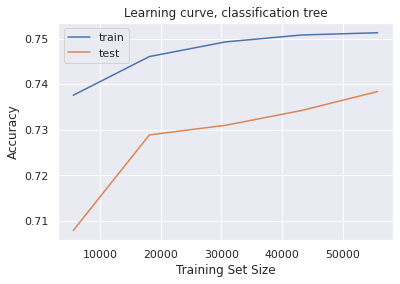

In [ ]:
plot_learning_curve(tree_cv.best_estimator_, X_train, y_train)

After tuning the hyperparameters of our model we have less bias. When we defined our original model we found that there was bias. Originally we had a difference of around .5% and now we are getting a difference of nearly 1%. So, our models learning curve has significantly improved.

#### Feature importance

Using feature importance, what are the most important features for this model?

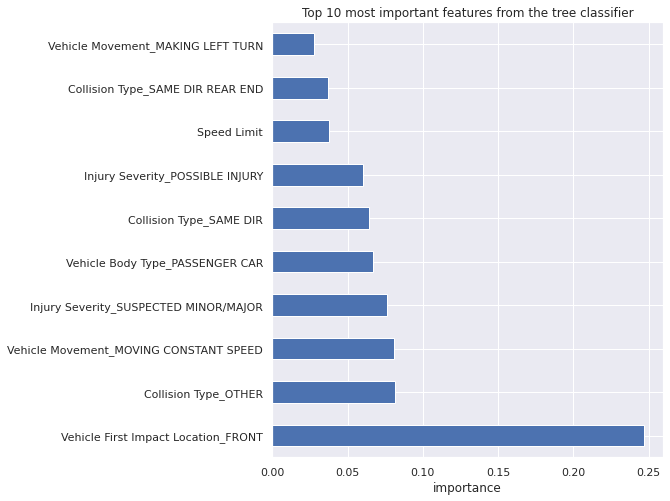

In [ ]:
s_feature = pd.Series(treeCV.best_estimator_.feature_importances_, index=predictors)
s_feature.sort_values(ascending=False)[:10].plot.barh(figsize=(7,8))
plt.title('Top 10 most important features from the tree classifier')
plt.xlabel('importance')
plt.ylabel('');

From this visual, we learn that the "Vehicle First Impact Location_FRONT" is by far the most important feature. The other features have some importance, but given the size of our data set after one-hot encoding, it seems a majority of variables have very little importance.

Using forward feature selection, what are the most important features for this model?

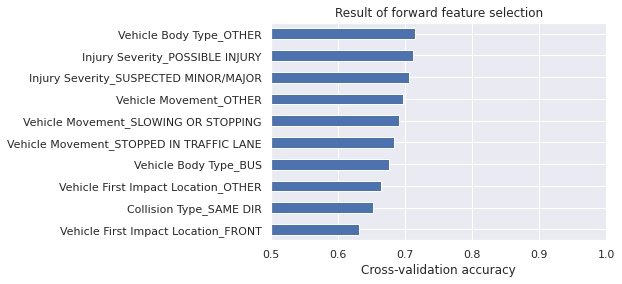

In [ ]:
selected, accuracies = forward_selection_classif(treeCV.best_estimator_, X_train, y_train, num_folds=10)
plot_selected(selected[:10], accuracies[:10], np.array(predictors))

From this plot, we find that the most important feature is 'Vehicle Impact Location_FRONT'. Just using this variable alone, we could get an accuracy score of about 65%. When we consider the top 10 important features we can get accuracy scores of up to about 71%. We found that our final accuracy value was 73.6%, it seems the remaining 30 variables in our model make up for the 2.6% increase.

#### Classification tree plot

What does our tuned classification tree model look like?

In [ ]:
plot_tree_custom(treeCV.best_estimator_)

## Conclusion

#### Data exploration conclusion

By exploring the damage extent at a deeper level we were able to understand the relationship between the disabling damage extent and environmental conditions. We found that most crashes occurred in clear weather, on dry roads, and during daylight hours. This is not very different from the initial analysis we did on the entire dataset. This makes sense because clear weather correlates with dry roads. Also, people tend to drive during the day more often than at night.

For the vehicle impact locations, we found that the most common impact location was the front of the car. This makes sense since the impact on the front of the car could cause damage to the engine.

When it comes to the vehicle information, we found that cars released in 2010-2020 had the highest distributions in the car crash data and passenger cars were the most common body type. It seemed that people were still driving cars from 2010-2020 because they are still modern. Cars made in the 90s and 2000s made up very little of the car crash data. It was interesting to learn that the most common body type in this car crash data was the passenger car. It could be that this body type occurs more in the data set since it is weaker, so crash impacts effect the engine more than bigger-reinforced vehicles.

#### Machine learning conclusion

When we started our machine learning we got a baseline. It was around 54% and from this point, we hoped that we could improve the score to get accurate predictions. When performing KNN classification we used two different models. We first started with a classifier that had default parameters. Using this model, we got an accuracy score that was better than our baseline but was not very reliable. When we tuned the hyperparameters of our model, we saw an increase in the accuracy score. At this point our accuracy score was 71% and was almost 20% better than our baseline, this is getting closer to the reliable prediction range. From here, we started building two different classification tree models. The first model we used allowed for overfitting. We found that the accuracy score for this model was 71%, which was better than our baseline and both of our KNN models. However, we found that the parameters we gave had a high bias. When we tuned the hyperparameters of our classification tree model we were able to get an accuracy score of about 73%. We also found that our learning curve improved and no longer had a high bias. 

In our classification tree model, we found that the most important features were the first impact location at the front of the car. This makes sense because if you damage your engine in a crash it could lead to your car being disabled. When performing forward feature selection we found vehicles with an impact location being the front of the car makes up about 65% of the accuracy score. This demonstrates to us just how important this feature was to our model.

We found that our tree classification model got better accuracies when compared to KNN classification. Also, the tree classification models were faster to train when compared to the KNN classification models. For this dataset, classification trees would be the preferred machine learning model to use.